z = 20 mm, Width_x = 2.599 mm, Width_y = 2.404 mm
z = 30 mm, Width_x = 1.773 mm, Width_y = 1.558 mm
z = 40 mm, Width_x = 0.934 mm, Width_y = 0.799 mm
z = 50 mm, Width_x = 0.106 mm, Width_y = 0.096 mm
z = 60 mm, Width_x = 0.830 mm, Width_y = 0.777 mm
z = 70 mm, Width_x = 1.483 mm, Width_y = 1.384 mm
z = 80 mm, Width_x = 2.106 mm, Width_y = 1.982 mm
z = 90 mm, Width_x = 2.945 mm, Width_y = 2.818 mm
z = 100 mm, Width_x = 3.907 mm, Width_y = 3.704 mm
z = 110 mm, Width_x = 4.456 mm, Width_y = 4.245 mm
z = 120 mm, Width_x = 5.235 mm, Width_y = 4.883 mm
z = 130 mm, Width_x = 6.117 mm, Width_y = 5.763 mm
z = 140 mm, Width_x = 6.814 mm, Width_y = 6.386 mm
z = 150 mm, Width_x = 10.990 mm, Width_y = 10.710 mm
z = 160 mm, Width_x = 11.210 mm, Width_y = 10.980 mm
z = 170 mm, Width_x = 11.590 mm, Width_y = 11.410 mm
z = 180 mm, Width_x = 11.660 mm, Width_y = 11.470 mm
z = 190 mm, Width_x = 11.830 mm, Width_y = 11.670 mm
z = 200 mm, Width_x = 11.900 mm, Width_y = 11.850 mm
z = 210 mm, Width_x = 12.04

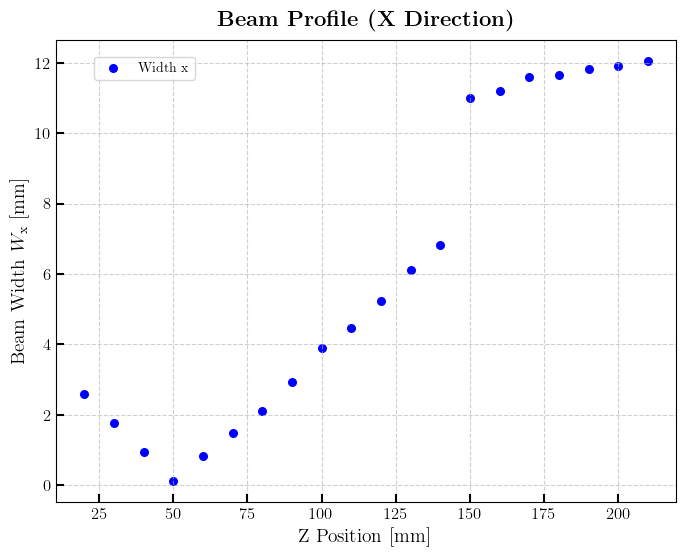

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/fig/beam_profile_y.png


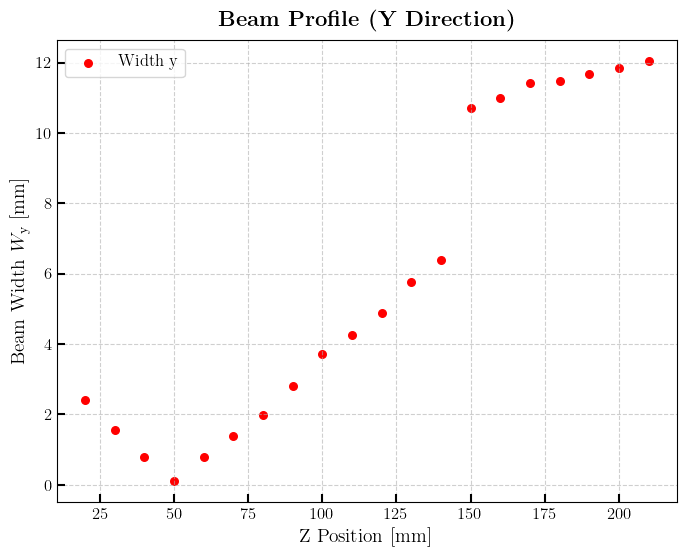

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/"
file_list = sorted(glob.glob(os.path.join(data_path, "*mm Beam Results.csv")))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

# Initializations
z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z = int(filename.split('mm')[0]) 
    z_values.append(z)

    # Read file contents
    with open(file, 'r') as f:
        lines = f.readlines()

    # Extract Width x and Width y from the text file
    for i, line in enumerate(lines):
        if "Waist x" in line:
            width_x.append(float(line.split()[2])) 
        if "Waist y" in line:
            width_y.append(float(line.split()[2])) 

# Convert to numpy arrays 
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort the data by z-values (increasing order)
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Waist_x = {wx:.3f} mm, Waist_y = {wy:.3f} mm")

# Plot Width x vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', marker='o', s=30, label=r'Waist x')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.05, 0.98), frameon=True)
#plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', marker='o', s=30, label=r'Waist y')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

### FITTING WITH ABCD MATRIX

Found beam width before the lens: Width x = 4.241 mm, Width y = 3.84 mm in /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/before lens Beam Results.csv
z = 20 mm, Width_x = 2.599 mm, Width_y = 2.404 mm
z = 30 mm, Width_x = 1.773 mm, Width_y = 1.558 mm
z = 40 mm, Width_x = 0.934 mm, Width_y = 0.799 mm
z = 50 mm, Width_x = 0.106 mm, Width_y = 0.096 mm
z = 60 mm, Width_x = 0.830 mm, Width_y = 0.777 mm
z = 70 mm, Width_x = 1.483 mm, Width_y = 1.384 mm
z = 80 mm, Width_x = 2.106 mm, Width_y = 1.982 mm
z = 90 mm, Width_x = 2.945 mm, Width_y = 2.818 mm
z = 100 mm, Width_x = 3.907 mm, Width_y = 3.704 mm
z = 110 mm, Width_x = 4.456 mm, Width_y = 4.245 mm
z = 120 mm, Width_x = 5.235 mm, Width_y = 4.883 mm
z = 130 mm, Width_x = 6.117 mm, Width_y = 5.763 mm
z = 140 mm, Width_x = 6.814 mm, Width_y = 6.386 mm
z = 150 mm, Width_x = 10.990 mm, Width_y = 10.710 mm
z = 160 mm, Width_x = 11.210 mm, Width_y = 10.980 mm
z = 170 mm, Width_x = 11.590 mm, Width_y = 11.410 mm
z = 

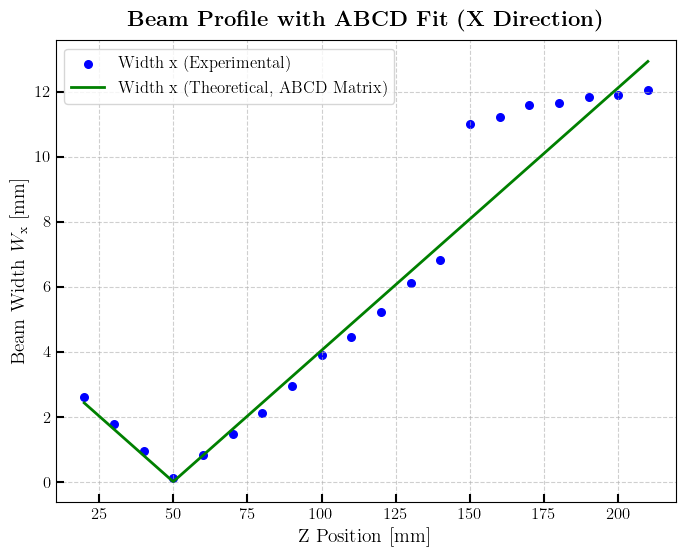

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/fig/beam_profile_ABCD_y.png


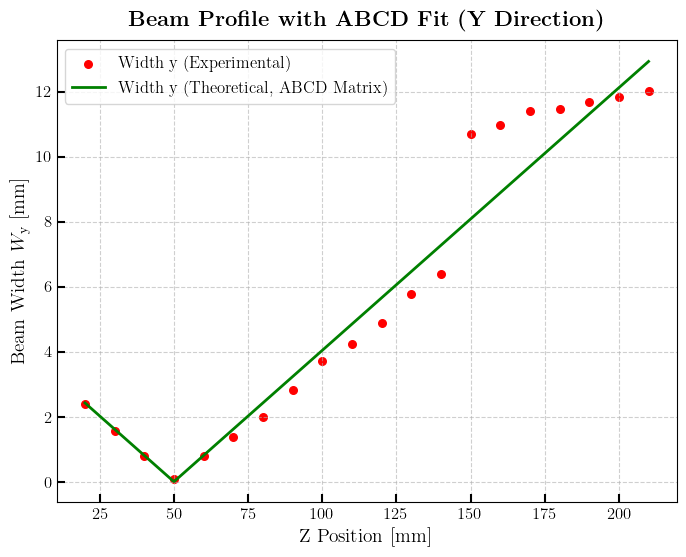

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm Beam Results.csv")) 
                    if "before lens" not in os.path.basename(f).lower()])
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

for file in file_list:
    filename = os.path.basename(file)
    z = int(filename.split('mm')[0])  
    z_values.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "Width x" in line:
            width_x.append(float(line.split()[2]))  
        if "Width y" in line:
            width_y.append(float(line.split()[2]))  

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Constants
focal_length = 50  # in mm
wavelength = 1.060e-3  # in mm 

# Beam waist after the lens (at focal length)
W0 = width_x.min()  # Minimum width from data
z_waist = z_values[np.argmin(width_x)]  # Position of the waist
z_R = np.pi * W0**2 / wavelength  # Rayleigh range at the waist in mm

'''
Initial beam parameter before the lens:
Assuming the beam to be collimated but with a finite waist before the lens
Estimate the beam waist before the lens (W0_initial) and its position
The lens focuses the beam at z = 50 mm, use the lens formula for Gaussian beams
'''

# Function to get initial beam waist from "before lens Beam Results.csv"
def get_initial_beam_waist(file_path):
    try:
        with open(file_path, 'r') as f:
            lines = f.readlines()
        width_x_initial = None
        width_y_initial = None
        found_2nd_moments = False
        
        for i, line in enumerate(lines):
            if "2nd Moments" in line:
                found_2nd_moments = True
            if found_2nd_moments and "Width x" in line:
                width_x_initial = float(line.split()[2])
            if found_2nd_moments and "Width y" in line:
                width_y_initial = float(line.split()[2])
        
        if width_x_initial is None or width_y_initial is None:
            print(f"Error: Could not find 'Width x' or 'Width y' in {file_path}. File content:")
            print("\n".join(lines))  # Print file content for debugging
            print("Using default W0_initial = 4 mm.")
            return 4.0  # Default value if data not found
        else:
            print(f"Found beam width before the lens: Width x = {width_x_initial} mm, Width y = {width_y_initial} mm in {file_path}")
            return (width_x_initial + width_y_initial) / 2
    except FileNotFoundError:
        print(f"Error: File {file_path} not found. Using default W0_initial = 4 mm.")
        return 4.0
    except Exception as e:
        print(f"Error reading {file_path}: {e}. Using default W0_initial = 4 mm.")
        return 4.0

# Read W0_initial from file
before_lens_file = os.path.join(data_path, "before lens Beam Results.csv")
W0_initial = get_initial_beam_waist(before_lens_file)  # Initial beam waist in mm (before the lens)
z_R_initial = np.pi * W0_initial**2 / wavelength  # Rayleigh range of initial beam
q0 = 0 + 1j * z_R_initial  # Beam parameter at z = 0

# Apply the lens transformation at z = 0
A_lens = 1
B_lens = 0
C_lens = -1 / focal_length
D_lens = 1

q1 = (A_lens * q0 + B_lens) / (C_lens * q0 + D_lens)  # Beam parameter just after the lens

# Theoretical z-values for the curve
z_theoretical = np.linspace(min(z_values), max(z_values), 500)
W_theoretical = np.zeros_like(z_theoretical)

# Propagate the beam in free space after the lens
for i, z in enumerate(z_theoretical):
    # ABCD matrix for free space propagation
    A_free = 1
    B_free = z
    C_free = 0
    D_free = 1

    # Transform the beam parameter
    q_new = (A_free * q1 + B_free) / (C_free * q1 + D_free)
    inv_q_new = 1 / q_new

    # Beam width from the imaginary part of 1/q_new
    # Ensure the imaginary part is negative (as expected for a Gaussian beam)
    if inv_q_new.imag < 0:
        W_theoretical[i] = np.sqrt(-wavelength / (np.pi * inv_q_new.imag))
    else:
        W_theoretical[i] = np.nan 

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")
    
# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist x (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with ABCD Fit (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_x = os.path.join(fig_dir, "beam_profile_ABCD_x.png")
plt.savefig(save_beam_ABCD_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.plot(z_theoretical, W_theoretical, color='g', linestyle='-', linewidth=2, label='Waist y (Theoretical, ABCD Matrix)')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with ABCD Fit (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_ABCD_y = os.path.join(fig_dir, "beam_profile_ABCD_y.png")
plt.savefig(save_beam_ABCD_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_ABCD_y}")
plt.show()

### FITTING WITH SEIGMAN FORMALISM

Without initial beam waist measurement

z = 20 mm, Width_x = 2.599 mm, Width_y = 2.404 mm
z = 30 mm, Width_x = 1.773 mm, Width_y = 1.558 mm
z = 40 mm, Width_x = 0.934 mm, Width_y = 0.799 mm
z = 50 mm, Width_x = 0.106 mm, Width_y = 0.096 mm
z = 60 mm, Width_x = 0.830 mm, Width_y = 0.777 mm
z = 70 mm, Width_x = 1.483 mm, Width_y = 1.384 mm
z = 80 mm, Width_x = 2.106 mm, Width_y = 1.982 mm
z = 90 mm, Width_x = 2.945 mm, Width_y = 2.818 mm
z = 100 mm, Width_x = 3.907 mm, Width_y = 3.704 mm
z = 110 mm, Width_x = 4.456 mm, Width_y = 4.245 mm
z = 120 mm, Width_x = 5.235 mm, Width_y = 4.883 mm
z = 130 mm, Width_x = 6.117 mm, Width_y = 5.763 mm
z = 140 mm, Width_x = 6.814 mm, Width_y = 6.386 mm
z = 150 mm, Width_x = 10.990 mm, Width_y = 10.710 mm
z = 160 mm, Width_x = 11.210 mm, Width_y = 10.980 mm
z = 170 mm, Width_x = 11.590 mm, Width_y = 11.410 mm
z = 180 mm, Width_x = 11.660 mm, Width_y = 11.470 mm
z = 190 mm, Width_x = 11.830 mm, Width_y = 11.670 mm
z = 200 mm, Width_x = 11.900 mm, Width_y = 11.850 mm
z = 210 mm, Width_x = 12.04

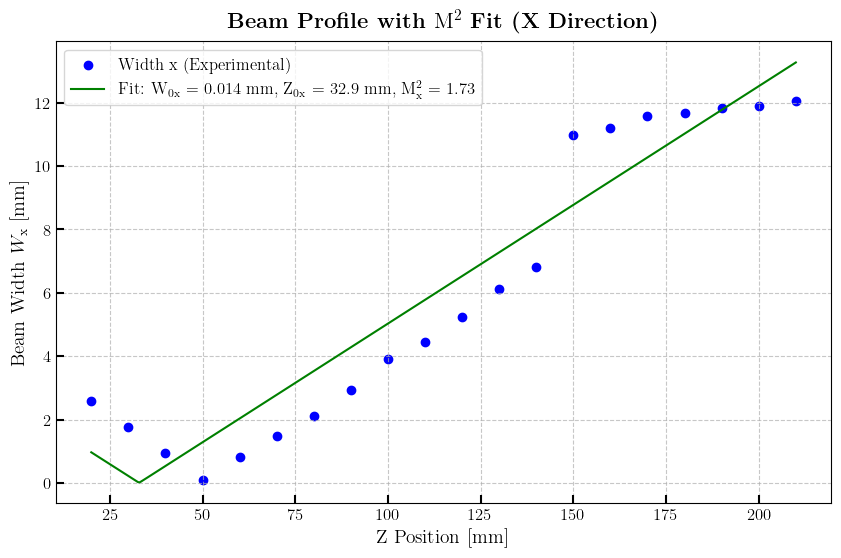

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/fig/beam_profile_M2_y.png


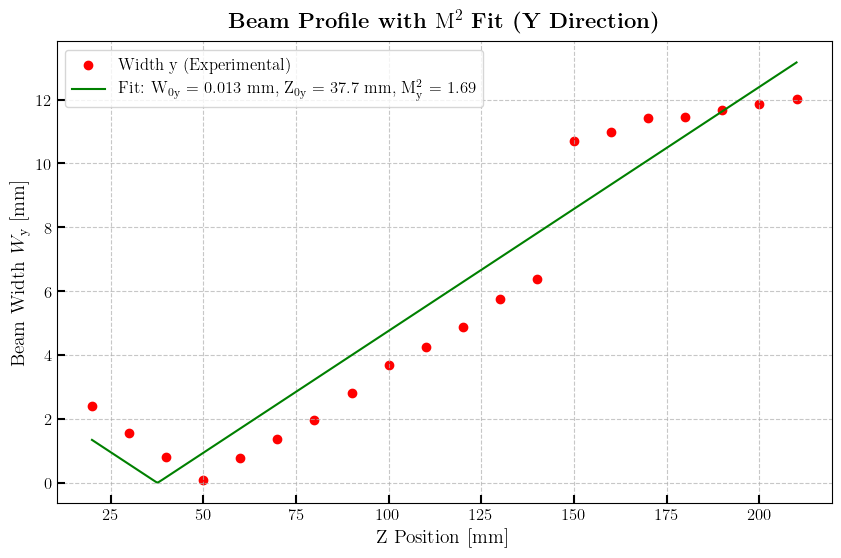

Fitted Parameters for x-direction:
W_0x = 0.014 ± 342.499 mm
z_0x = 32.9 ± 23.0 mm
M_x^2 = 1.73 ± 21937.00

Fitted Parameters for y-direction:
W_0y = 0.013 ± 319.056 mm
z_0y = 37.7 ± 19.9 mm
M_y^2 = 1.69 ± 21408.34


In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/Focus Laser/20250324/"
file_list = sorted(glob.glob(os.path.join(data_path, "*mm Beam Results.csv")))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)


z_values = []
width_x = []
width_y = []

# Read experimental data
for file in file_list:
    filename = os.path.basename(file)
    z = int(filename.split('mm')[0]) 
    z_values.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "Width x" in line:
            width_x.append(float(line.split()[2]))  
        if "Width y" in line:
            width_y.append(float(line.split()[2]))  

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Constants
wavelength = 1.060e-3  # in mm (1060 nm)

# M^2 beam propagation function (based on Siegman)
def beam_width_squared(z, W0, z0, M2):
    """
    W^2(z) = W0^2 + M^4 * (lambda / (pi * W0))^2 * (z - z0)^2
    Parameters:
    - W0: Beam waist size (mm)
    - z0: Waist location (mm)
    - M2: Beam quality factor (M^2)
    """
    theta = M2**2 * (wavelength / (np.pi * W0))  # Far-field divergence term
    return W0**2 + (theta**2) * (z - z0)**2

# Fit parameters [W0, z0, M2]: Initial guess
initial_guess_x = [min(width_x), z_values[np.argmin(width_x)], 1.0]  
initial_guess_y = [min(width_y), z_values[np.argmin(width_y)], 1.0]  

# Fit the model to the squared beam widths for x-direction
try:
    popt_x, pcov_x = curve_fit(beam_width_squared, z_values, width_x**2, p0=initial_guess_x, 
                               bounds=([0, min(z_values), 1], [np.inf, max(z_values), np.inf]), 
                               maxfev=10000) # Max function evaluations (increase if needed)   
    W0x_fit, z0x_fit, M2x_fit = popt_x
    W0x_err, z0x_err, M2x_err = np.sqrt(np.diag(pcov_x))  # Standard errors
except RuntimeError as e:
    print(f"Fit failed for x-direction: {e}")
    W0x_fit, z0x_fit, M2x_fit = initial_guess_x  # Fallback to initial guess
    W0x_err, z0x_err, M2x_err = [np.nan, np.nan, np.nan]

# Fit the model to the squared beam widths for y-direction
try:
    popt_y, pcov_y = curve_fit(beam_width_squared, z_values, width_y**2, p0=initial_guess_y, 
                               bounds=([0, min(z_values), 1], [np.inf, max(z_values), np.inf]), 
                               maxfev=10000)  
    W0y_fit, z0y_fit, M2y_fit = popt_y
    W0y_err, z0y_err, M2y_err = np.sqrt(np.diag(pcov_y))  
except RuntimeError as e:
    print(f"Fit failed for y-direction: {e}")
    W0y_fit, z0y_fit, M2y_fit = initial_guess_y 
    W0y_err, z0y_err, M2y_err = [np.nan, np.nan, np.nan]

# Generate theoretical curves for plotting
z_theoretical = np.linspace(min(z_values), max(z_values), 500)
Wx_theoretical = np.sqrt(beam_width_squared(z_theoretical, W0x_fit, z0x_fit, M2x_fit))
Wy_theoretical = np.sqrt(beam_width_squared(z_theoretical, W0y_fit, z0y_fit, M2y_fit))

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")
    
# Plot Width x vs. z
plt.figure(figsize=(10, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)')
plt.plot(z_theoretical, Wx_theoretical, color='g', linestyle='-',
         label=r'Fit: $\rm{W_{0x}}$' + f' = {W0x_fit:.3f} mm, 'r'$\rm{Z_{{0x}}}$' + f' = {z0x_fit:.1f} mm, ' r'$\rm{M_x^2}$' + f' = {M2x_fit:.2f}')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with $\rm{M}^2$ Fit (X Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.7)
save_beam_M2_x = os.path.join(fig_dir, "beam_profile_M2_x.png")
plt.savefig(save_beam_M2_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_M2_x}")
plt.show()

# Plot Width y vs. z
plt.figure(figsize=(10, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)')
plt.plot(z_theoretical, Wy_theoretical, color='g', linestyle='-',
         label=r'Fit: $\rm{W_{0y}}$' + f' = {W0y_fit:.3f} mm, 'r'$\rm{Z_{{0y}}}$' + f' = {z0y_fit:.1f} mm, ' r'$\rm{M_y^2}$' + f' = {M2y_fit:.2f}')
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile with $\rm{M}^2$ Fit (Y Direction)}', fontsize=16, fontweight='bold', pad=10)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.7)
save_beam_M2_y = os.path.join(fig_dir, "beam_profile_M2_y.png")
plt.savefig(save_beam_M2_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_M2_y}")
plt.show()

# Print fitted parameters with errors
print("Fitted Parameters for x-direction:")
print(f"W_0x = {W0x_fit:.3f} ± {W0x_err:.3f} mm")
print(f"z_0x = {z0x_fit:.1f} ± {z0x_err:.1f} mm")
print(f"M_x^2 = {M2x_fit:.2f} ± {M2x_err:.2f}")

print("\nFitted Parameters for y-direction:")
print(f"W_0y = {W0y_fit:.3f} ± {W0y_err:.3f} mm")
print(f"z_0y = {z0y_fit:.1f} ± {z0y_err:.1f} mm")
print(f"M_y^2 = {M2y_fit:.2f} ± {M2y_err:.2f}")